Notebook imports and Packages 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [11]:
def f(x):
    return x**2+x+1

#Make Data
x_1= np.linspace(start=-3,stop=3,num=100)
def df( x_1 ):
    return 2*x_1+1

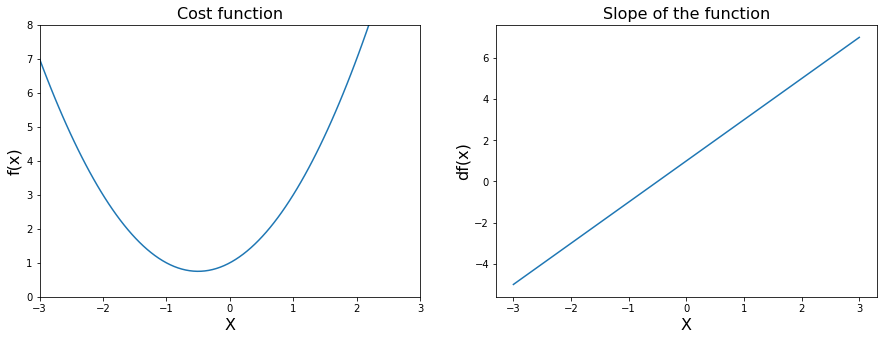

In [12]:
#plot
plt.figure(figsize=[15,5])

#chart 1: cost function
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim([0,8])

plt.title('Cost function',fontsize=16)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1))

#chart 2: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the function',fontsize=16)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.plot(x_1,df(x_1))
plt.show()

Slope and Derivative:
Create a python function for the derivative of f(x) called d(x)

Python Loops and gradient descent

In [43]:
#Gradient Descent 
new_x=5
prev_x=0
step_mul=0.1
precision=0.00001
x_list=[new_x]
slope_list=[df(new_x)]
for n in range(500):
    prev_x=new_x
    gradient=df(prev_x)
    new_x=prev_x-step_mul*gradient
    step_size=abs(new_x-prev_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))

    if(step_size<precision):
        print('Loop ran this many times:',n)
        break

print('Local minimum occurs at:',new_x)
print('Slope or df(x) value at this point is:',df(new_x))
print('f(x) value or cost at this new point is:',f(new_x))

Loop ran this many times: 53
Local minimum occurs at: -0.4999678469639787
Slope or df(x) value at this point is: 6.430607204255256e-05
f(x) value or cost at this new point is: 0.7500000010338177


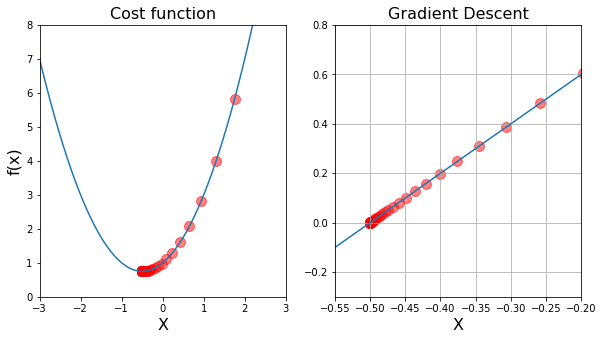

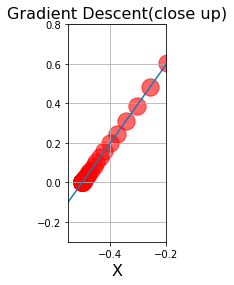

In [44]:
#superimpose gradient descent calculations on the plot 
from matplotlib.pyplot import ylim


plt.figure(figsize=[15,5])

#chart 1: cost function
plt.subplot(1,3,1)

plt.xlim([-3,3])
plt.ylim([0,8])

plt.title('Cost function',fontsize=16)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)

plt.plot(x_1,f(x_1))
values=np.array(x_list)
plt.scatter(x_list,f(values), color='red',s=100,alpha=0.5)


#chart 2: Derivative
plt.subplot(1,3,2)
plt.title('Gradient Descent',fontsize=16)
plt.xlabel('X',fontsize=16)

plt.grid()
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.plot(x_1,df(x_1))
plt.scatter(x_list,slope_list, color='red', s=100, alpha=0.5)
plt.show()

#Chart 3: Derivative (Close up)
plt.subplot(1,3,3)
plt.title('Gradient Descent(close up)',fontsize=16)
plt.xlabel('X',fontsize=16)

plt.grid()
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.plot(x_1,df(x_1))
plt.scatter(x_list,slope_list, color='red', s=300, alpha=0.6)
plt.show()

Example 2- Multiple minima vs Initial guess and Advanced Guess

g(x)= x^4 - 4x^2+5


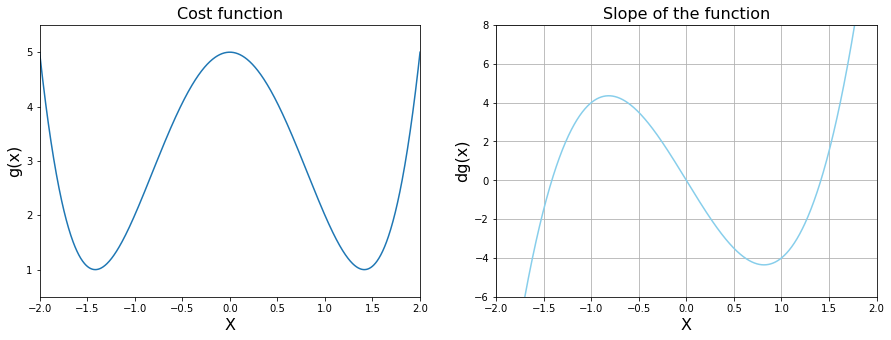

In [49]:
#new_data
x_2=np.linspace(-2,2,1000)
def g(x):
    return x**4 - 4*x**2+5
def dg(x):
    return 4*x**3-8*x
#plot
plt.figure(figsize=[15,5])

#chart 1: cost function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])

plt.title('Cost function',fontsize=16)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2))

#chart 2: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the function',fontsize=16)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.plot(x_2, dg(x_2), color='skyblue')
plt.show()

Gradient Descent as a Python function

In [51]:
#Gradient Descent 
def gradient_descent(derivative_func,initial_guess,multiplier,precision):
    #indent block-ctrl+]
    new_x=initial_guess
    x_list=[new_x]
    slope_list=[derivative_func(new_x)]
    for n in range(500):
        prev_x=new_x
        gradient=derivative_func(prev_x)
        new_x=prev_x-multiplier*gradient
        step_size=abs(new_x-prev_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if(step_size<precision):
            break
    return new_x, x_list, slope_list

In [64]:
local_min,list_x,deriv_list=gradient_descent(derivative_func=dg,initial_guess=0,multiplier=0.02,precision=0.00001)
print('Local min occurs at:',local_min)
print('Number of Steps:',len(list_x))


Local min occurs at: 0.0
Number of Steps: 2


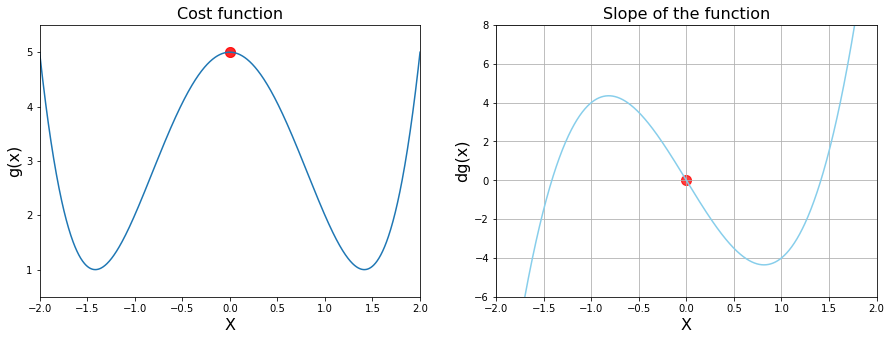

In [65]:
#calling the Gradient descent

#Plot function and derivative and scatter plots side by side


#plot
plt.figure(figsize=[15,5])

#chart 1: cost function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])

plt.title('Cost function',fontsize=16)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2))
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)

#chart 2: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the function',fontsize=16)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.plot(x_2, dg(x_2), color='skyblue')
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)
plt.show()